<h1># Part 1: Loading datasets, cleaning and joining datasets</h1>

<h3>1.1 Loading Libraries</h3>

In [28]:
import pandas as pd
import os
import yaml
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import plotly.graph_objs as go
from ipywidgets import interact, IntSlider
import plotly.express as px

<h3>1.2 Loading Datasets</h3>

In [29]:
def get_config():
    with open("config.yaml", "r") as my_config:
        config = yaml.safe_load(my_config)
    return config
config = get_config()
        
df_consumption = pd.read_csv(config['consumption'])
df_death = pd.read_csv(config['death'])
df_population = pd.read_csv(config['population'])


In [30]:
df_consumption.dtypes
df_death.dtypes
df_population.dtypes

Year                 int64
Country             object
Total Population     int64
dtype: object

<h3>1.3: Data Cleaning</h3> 

In [31]:
# Check for missing data
print(df_consumption.isnull().sum())
print(df_death.isnull().sum())
print(df_population.isnull().sum())



Entity                                                                                                   0
Code                                                                                                    65
Year                                                                                                     0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)     0
dtype: int64
Country                                                                                                                  0
Code                                                                                                                   690
Year                                                                                                                     0
Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages                  0
Deaths that are from all causes attributed to diet high in sodium, 

In [32]:
# Remove rows with NaN values (EXPLANATION)

df_consumption.dropna()

df_death.dropna()


,Country,Code,Year,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages","Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages","Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
0,Afghanistan,AFG,1990,25633.129,1044.9089,7077.3160,356.21470,3184.9550,3701.9940,4794.4650,...,173.57869,388.91074,2015.51150,7685.74270,2216.04150,563.81067,2782.4385,2636.64550,4825.3450,12704.7810
1,Afghanistan,AFG,1991,25871.803,1054.9584,7149.0854,363.73020,3248.3767,4309.2820,4921.0957,...,187.89368,388.78424,2056.35380,7885.67240,2501.02510,610.78830,2845.6702,2651.88650,5127.1780,12843.5130
2,Afghanistan,AFG,1992,26308.795,1074.6057,7297.3086,375.90024,3350.9207,5356.4980,5278.5186,...,210.81355,392.72090,2100.43100,8567.74000,3052.53880,699.58734,3030.8933,2687.92240,5888.8438,13125.6210
3,Afghanistan,AFG,1993,26961.360,1103.3705,7498.5340,388.57156,3479.8118,7151.5210,5734.0303,...,232.17093,410.67044,2315.59060,9875.29000,3725.87570,772.88920,3255.7598,2744.35990,7006.9080,13501.3545
4,Afghanistan,AFG,1994,27658.424,1133.8824,7697.5890,398.72700,3609.8315,7191.6390,6050.2290,...,247.29659,412.98883,2664.55370,11030.84800,3832.53170,811.97064,3400.9597,2805.21950,7421.1280,13872.5840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,11483.307,1062.7714,1353.5919,4853.71830,1820.3645,4335.9062,1613.8134,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338
6836,Zimbabwe,ZWE,2016,11662.818,1081.5592,1382.9396,4915.49170,1854.2546,4244.4795,1625.2667,...,1041.80350,414.93375,100.74864,674.07230,699.98810,275.09952,2723.1400,318.11215,4294.5996,3346.3604
6837,Zimbabwe,ZWE,2017,11818.670,1097.7340,1408.9166,4991.75340,1882.9751,4192.6160,1624.9282,...,1007.37440,424.07550,82.42957,629.17920,678.33685,266.91394,2630.3557,326.67880,4250.6826,3410.7505
6838,Zimbabwe,ZWE,2018,12002.042,1116.5680,1439.0463,5044.16060,1917.0316,4012.9230,1627.9741,...,969.35500,433.54470,84.65486,606.91940,643.89320,260.99170,2599.9414,334.54236,4152.8130,3481.9556


In [33]:
#Check for duplicates across all columns, if duplicates found, delete one row
df_duplicate_consumption = df_consumption[df_consumption.duplicated()]
df_duplicate_death = df_death[df_death.duplicated()]
df_duplicate_population = df_population[df_population.duplicated()]

# Remove duplicate rows
df_consumption = df_consumption.drop_duplicates()
df_death = df_death.drop_duplicates()
df_population = df_population.drop_duplicates()

# Ensure 'Year' is of integer type
df_consumption['Year'] = df_consumption['Year'].astype(int)
df_death['Year'] = df_death['Year'].astype(int)
df_population['Year'] = df_population['Year'].astype(int)

In [34]:
#Rename the Title Entity to Country
df_consumption.rename(columns = {'Entity':'Country','Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)':'Alchohol consumption'
                                 },inplace = True)
df_consumption
#Rename the Title Entity to Country
df_death.rename(columns={'Entity':'Country','Deaths that are from all causes attributed to alcohol use, in both sexes aged all ages':'Deaths due to Alchohol'},inplace = True)
#df_death

In [35]:
#filter related rows from each datasets(for merging 3 datasets based on Year and country I had to remove years except 2000,2005,2010,2015,2018)
df_death = df_death[df_death['Year'].isin([2000, 2005, 2010, 2015, 2018])]
df_death


,Country,Code,Year,"Deaths that are from all causes attributed to high systolic blood pressure, in both sexes aged all ages","Deaths that are from all causes attributed to diet high in sodium, in both sexes aged all ages","Deaths that are from all causes attributed to diet low in whole grains, in both sexes aged all ages",Deaths due to Alchohol,"Deaths that are from all causes attributed to diet low in fruits, in both sexes aged all ages","Deaths that are from all causes attributed to unsafe water source, in both sexes aged all ages","Deaths that are from all causes attributed to secondhand smoke, in both sexes aged all ages",...,"Deaths that are from all causes attributed to drug use, in both sexes aged all ages","Deaths that are from all causes attributed to low bone mineral density, in both sexes aged all ages","Deaths that are from all causes attributed to vitamin a deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to child stunting, in both sexes aged all ages","Deaths that are from all causes attributed to non-exclusive breastfeeding, in both sexes aged all ages","Deaths that are from all causes attributed to iron deficiency, in both sexes aged all ages","Deaths that are from all causes attributed to ambient particulate matter pollution, in both sexes aged all ages","Deaths that are from all causes attributed to low physical activity, in both sexes aged all ages","Deaths that are from all causes attributed to no access to handwashing facility, in both sexes aged all ages","Deaths that are from all causes attributed to high ldl cholesterol, in both sexes aged all ages"
10,Afghanistan,AFG,2000,29998.512,1259.57850,8328.0750,427.25616,4174.3380,9941.9700,6227.1470,...,311.84225,430.62665,3855.29440,12964.92100,4194.97170,897.32550,3541.8700,3013.05200,8233.2160,14938.0480
15,Afghanistan,AFG,2005,30089.117,1276.12820,8415.4460,451.53430,4165.9834,10118.1620,6272.2593,...,390.27414,454.32657,1243.22450,8380.31500,3518.79900,1006.88530,3732.9456,3152.82700,8033.1580,15250.3930
20,Afghanistan,AFG,2010,30352.130,1247.56070,8511.7920,491.64770,4022.3460,6020.6436,5714.1074,...,463.43330,515.36005,1413.23690,6192.16000,2661.02320,980.61330,4922.3520,3344.46040,5535.3350,15760.8450
25,Afghanistan,AFG,2015,32639.936,1301.69100,9228.3820,521.93640,4163.0680,4796.1630,5785.0560,...,566.39777,589.87384,697.57830,4205.58900,2310.97310,832.58203,7675.1245,3694.98970,4693.1943,17378.7680
28,Afghanistan,AFG,2018,35262.600,1400.24900,10085.0030,574.54584,4486.7295,3993.8105,5987.4893,...,673.01670,642.23627,608.28670,3535.81520,1881.78530,778.18884,8131.1520,4021.10400,4077.5671,19182.7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,Zimbabwe,ZWE,2000,8393.635,775.16970,986.0451,4209.50540,1337.9380,3441.2383,1040.5237,...,2324.43000,366.97803,75.75593,448.79333,854.69806,128.49417,2041.1204,234.17902,3130.7087,2322.9863
6825,Zimbabwe,ZWE,2005,9929.571,888.01170,1128.9970,4486.24000,1543.6849,3767.3696,1308.7529,...,2499.60940,367.50400,184.08083,702.63885,960.69147,215.56279,2239.5164,266.41962,3641.5980,2696.5974
6830,Zimbabwe,ZWE,2010,11267.929,1008.75586,1294.0924,4939.37400,1766.6945,4888.1514,1605.0945,...,1600.52200,406.22180,252.08212,911.78296,1037.02470,337.40857,2397.7366,288.18127,4560.4854,3111.3062
6835,Zimbabwe,ZWE,2015,11483.307,1062.77140,1353.5919,4853.71830,1820.3645,4335.9062,1613.8134,...,1067.76540,407.44086,137.89296,729.65375,733.78687,281.98135,2784.9744,309.46160,4328.0870,3276.1338


In [36]:

new_columns = ['Country','Code','Year','Deaths due to Alchohol']

df_new_death = df_death[new_columns]

df_new_death.to_csv('df_new_death.csv', index=False)

<h3>1.4: Merging Datasets</h3>

In [37]:
#merge 2 datasets(Merged BASED on Country and Year column)
df_merge = pd.merge(df_consumption,df_new_death)
df_merge

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol
0,Afghanistan,AFG,2010,0.21,491.64770
1,Afghanistan,AFG,2015,0.21,521.93640
2,Afghanistan,AFG,2018,0.21,574.54584
3,Albania,ALB,2000,6.57,511.38745
4,Albania,ALB,2005,7.65,640.57010
...,...,...,...,...,...
939,Zimbabwe,ZWE,2000,2.46,4209.50540
940,Zimbabwe,ZWE,2005,2.77,4486.24000
941,Zimbabwe,ZWE,2010,3.93,4939.37400
942,Zimbabwe,ZWE,2015,4.92,4853.71830


In [38]:
#Merge population dataset with the main dataset(to create Mortality for each individual country ,total population is needed)

df = pd.merge(df_merge,df_population, on=['Country','Year'], how='right')
df

,Country,Code,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,China,CHN,2000,3.81,395116.800000,1266727000
1,India,IND,2000,2.28,208534.140000,1050012000
2,United States,USA,2000,9.19,80477.360000,284964000
3,Indonesia,IDN,2000,0.50,14972.049000,212544000
4,Brazil,BRA,2000,8.78,61444.023000,174693000
...,...,...,...,...,...,...
980,San Marino,NaN,2018,NaN,NaN,34000
981,Palau,NaN,2018,NaN,NaN,18000
982,Nauru,NRU,2018,3.71,2.744935,12000
983,Tuvalu,TUV,2018,1.52,1.409239,11000


In [39]:
#remove Column name Code (as i already have the Country column so i dont need the code Column)

df = df.drop(columns='Code')
df

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,China,2000,3.81,395116.800000,1266727000
1,India,2000,2.28,208534.140000,1050012000
2,United States,2000,9.19,80477.360000,284964000
3,Indonesia,2000,0.50,14972.049000,212544000
4,Brazil,2000,8.78,61444.023000,174693000
...,...,...,...,...,...
980,San Marino,2018,NaN,NaN,34000
981,Palau,2018,NaN,NaN,18000
982,Nauru,2018,3.71,2.744935,12000
983,Tuvalu,2018,1.52,1.409239,11000


In [40]:
#remove NaN value
df.dropna(how='any',inplace=True)
df

,Country,Year,Alchohol consumption,Deaths due to Alchohol,Total Population
0,China,2000,3.81,395116.800000,1266727000
1,India,2000,2.28,208534.140000,1050012000
2,United States,2000,9.19,80477.360000,284964000
3,Indonesia,2000,0.50,14972.049000,212544000
4,Brazil,2000,8.78,61444.023000,174693000
...,...,...,...,...,...
974,Andorra,2018,11.02,39.036380,74000
975,Dominica,2018,11.18,31.424400,71000
976,Saint Kitts and Nevis,2018,8.94,23.100368,48000
982,Nauru,2018,3.71,2.744935,12000


In [41]:
#save dataset
df.to_csv('df.csv')

In [42]:
#Remove World from df because my rearch is based on country
df = df[df["Country"] != 'World']

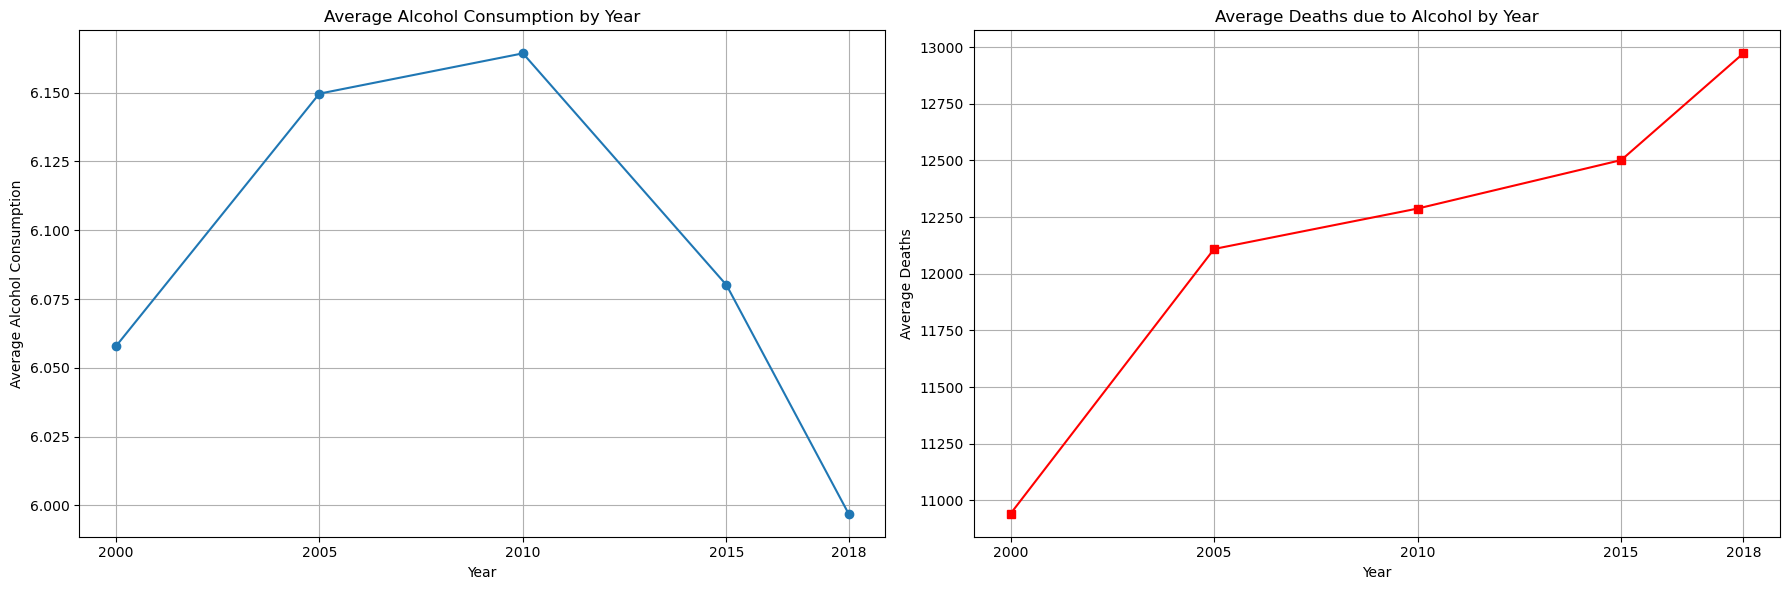

In [43]:
# Filter the dataset for each specified year
df_2000 = df[df['Year'] == 2000]
df_2005 = df[df['Year'] == 2005]
df_2010 = df[df['Year'] == 2010]
df_2015 = df[df['Year'] == 2015]
df_2018 = df[df['Year'] == 2018]

# Calculate mean alcohol consumption and deaths for each year
mean_consumption = {
    2000: df_2000['Alchohol consumption'].mean(),
    2005: df_2005['Alchohol consumption'].mean(),
    2010: df_2010['Alchohol consumption'].mean(),
    2015: df_2015['Alchohol consumption'].mean(),
    2018: df_2018['Alchohol consumption'].mean()
}

mean_deaths = {
    2000: df_2000['Deaths due to Alchohol'].mean(),
    2005: df_2005['Deaths due to Alchohol'].mean(),
    2010: df_2010['Deaths due to Alchohol'].mean(),
    2015: df_2015['Deaths due to Alchohol'].mean(),
    2018: df_2018['Deaths due to Alchohol'].mean()
}

# Plotting side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot for Average Alcohol Consumption
axs[0].plot(list(mean_consumption.keys()), list(mean_consumption.values()), marker='o', linestyle='-')
axs[0].set_title('Average Alcohol Consumption by Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Average Alcohol Consumption')
axs[0].grid(True)
axs[0].set_xticks(list(mean_consumption.keys()))

# Plot for Average Deaths due to Alcohol
axs[1].plot(list(mean_deaths.keys()), list(mean_deaths.values()), marker='s', linestyle='-', color='red')
axs[1].set_title('Average Deaths due to Alcohol by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Deaths')
axs[1].grid(True)
axs[1].set_xticks(list(mean_deaths.keys()))

plt.tight_layout()
plt.show()


In [44]:
# Step 1: Calculate Mortality Rate due to Alcohol per 100,000 population
df['Mortality Rate'] = (df['Deaths due to Alchohol'] / df['Total Population']) * 100000

# Step 2: Aggregate data by Year to analyze global trends over time
# Calculate mean alcohol consumption and mean mortality rate per year
yearly_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

# To view the first few rows of the transformed main DataFrame
print(df[['Country', 'Year', 'Alchohol consumption', 'Deaths due to Alchohol', 'Total Population', 'Mortality Rate']].head())

# To view the yearly trends
print(yearly_trends.head())


         Country  Year  Alchohol consumption  Deaths due to Alchohol  \
0          China  2000                  3.81              395116.800   
1          India  2000                  2.28              208534.140   
2  United States  2000                  9.19               80477.360   
3      Indonesia  2000                  0.50               14972.049   
4         Brazil  2000                  8.78               61444.023   

   Total Population  Mortality Rate  
0        1266727000       31.191946  
1        1050012000       19.860167  
2         284964000       28.241237  
3         212544000        7.044212  
4         174693000       35.172573  
   Year  Alchohol consumption  Mortality Rate
0  2000              6.057767       34.090226
1  2005              6.149659       35.213191
2  2010              6.164311       35.117312
3  2015              6.080077       33.854617
4  2018              5.996945       34.047410


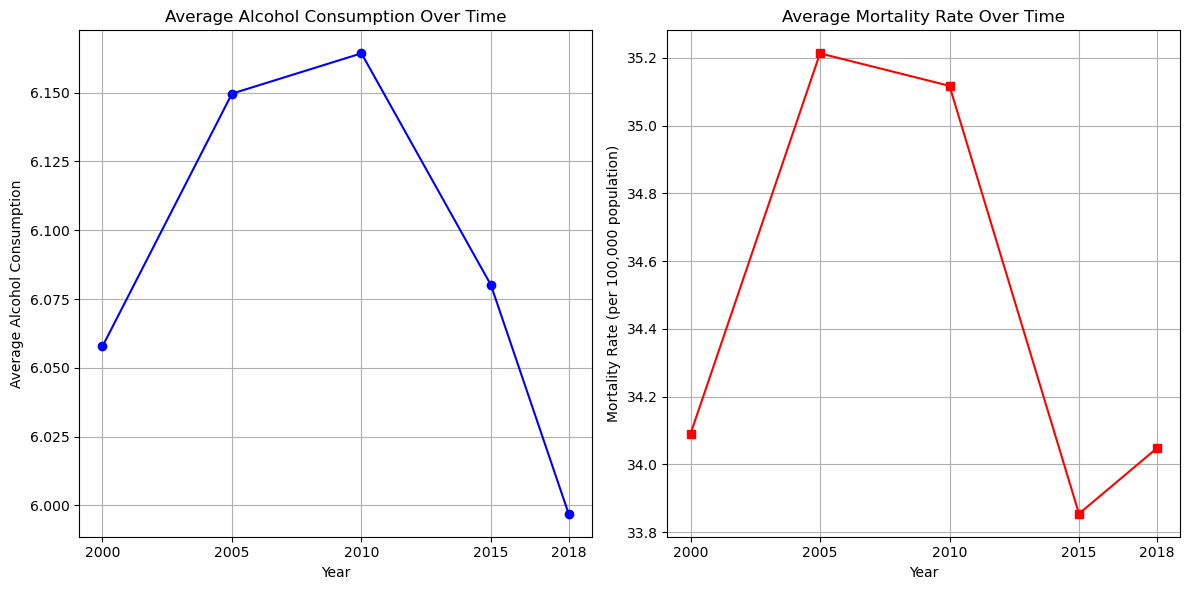

In [45]:
yearly_trends_filtered = yearly_trends[~yearly_trends['Year'].astype(str).str.endswith(('.0', '.5'))]

# Plotting without years ending in .0 or .5
plt.figure(figsize=(12, 6))

# Alcohol Consumption Plot
plt.subplot(1, 2, 1)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Alchohol consumption'], marker='o', linestyle='-', color='blue')
plt.title('Average Alcohol Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption')
plt.xticks(yearly_trends_filtered['Year'].unique())  # Displaying only the filtered years on the x-axis
plt.grid(True)

# Mortality Rate Plot
plt.subplot(1, 2, 2)
plt.plot(yearly_trends_filtered['Year'], yearly_trends_filtered['Mortality Rate'], marker='s', linestyle='-', color='red')
plt.title('Average Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.xticks(yearly_trends_filtered['Year'].unique())  # Displaying only the filtered years on the x-axis
plt.grid(True)

plt.tight_layout()  # Adjust subplot parameters
plt.show()  # Display the plots


There is a positive correlation between alcohol consumption and mortality rate due to alcohol. This means that as alcohol consumption increases, the mortality rate due to alcohol also increases

Data Analysis

In [46]:
# 1. Descriptive Statistics for alcohol consumption and mortality rates
descriptive_stats = df[['Alchohol consumption', 'Mortality Rate']].describe()

# 2. Correlation Analysis between alcohol consumption and mortality rates
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

# 3. Comparative Analysis: Identifying countries with significant changes
# We will calculate the mean and standard deviation for alcohol consumption and mortality rates for each country
comparative_analysis = df.groupby('Country').agg({
    'Alchohol consumption': ['mean', 'std'],
    'Mortality Rate': ['mean', 'std']
}).reset_index()

# To view the descriptive statistics
print(descriptive_stats)

# To view the correlation analysis
print(correlation_analysis)

# To view the comparative analysis for the first few countries
print(comparative_analysis.head())


       Alchohol consumption  Mortality Rate
count            894.000000      894.000000
mean               6.089512       34.461728
std                4.299930       27.282453
min                0.000000        0.668772
25%                2.190000       15.065044
50%                5.615000       31.406040
75%                9.487500       45.476747
max               20.500000      214.849635
                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000
       Country Alchohol consumption           Mortality Rate          
                               mean       std           mean       std
0  Afghanistan                0.210  0.000000       1.640564  0.111313
1      Albania                7.164  0.511253      22.069201  3.845094
2      Algeria                0.784  0.165167       2.588453  0.390011
3      Andorra               11.794  1.056092      48.894803  3.598349
4

C:\Users\dipro\AppData\Local\Temp\ipykernel_9420\3800928864.py:18: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\dipro\AppData\Local\Temp\ipykernel_9420\3800928864.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



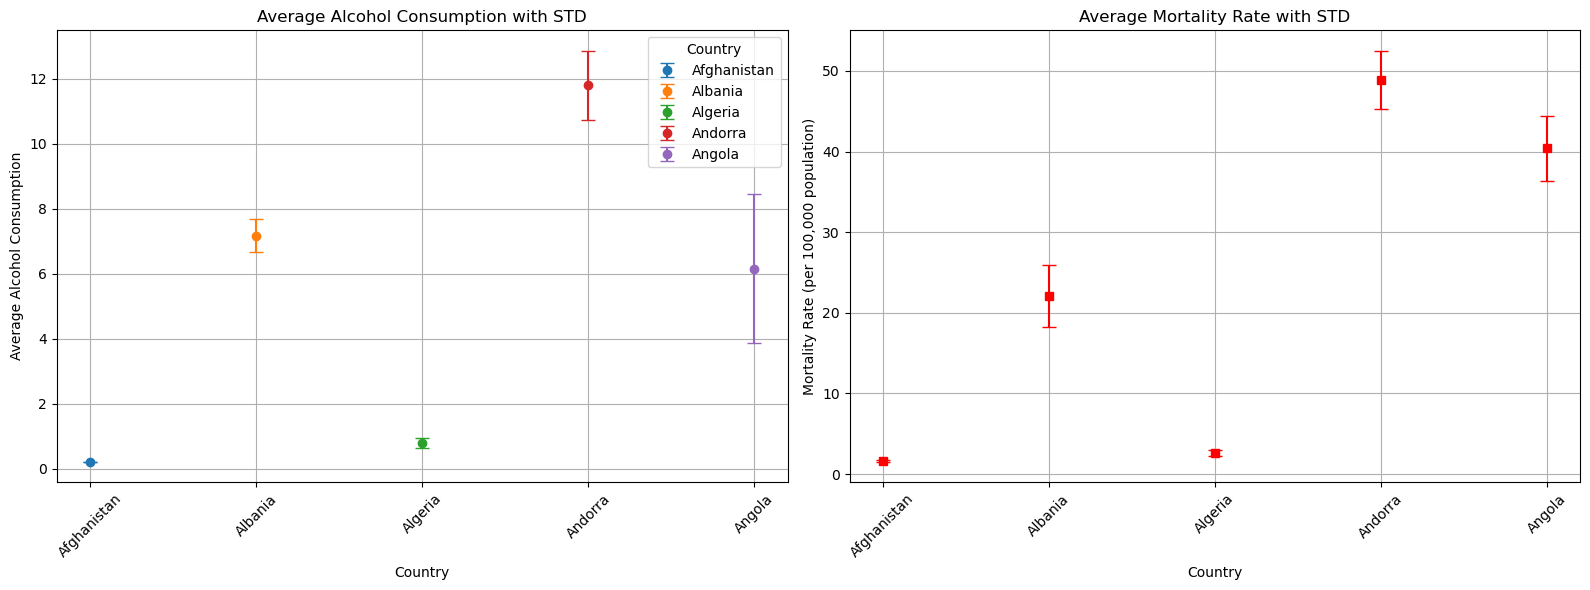

In [47]:
# Plotting Alcohol Consumption and Mortality Rate with Mean and STD Indicators

# Selecting a few countries for illustrative plotting
sample_countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']
sample_data = comparative_analysis[comparative_analysis['Country'].isin(sample_countries)]

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Alcohol Consumption Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[0].errorbar(country, country_data['Alchohol consumption']['mean'], yerr=country_data['Alchohol consumption']['std'], fmt='o', capsize=5, label=country)

ax[0].set_title('Average Alcohol Consumption with STD')
ax[0].set_xlabel('Country')
ax[0].set_ylabel('Average Alcohol Consumption')
ax[0].set_xticklabels(sample_countries, rotation=45)
ax[0].grid(True)
ax[0].legend(title='Country')

# Mortality Rate Plot
for country in sample_countries:
    country_data = sample_data[sample_data['Country'] == country]
    ax[1].errorbar(country, country_data['Mortality Rate']['mean'], yerr=country_data['Mortality Rate']['std'], fmt='s', capsize=5, color='red', label=country)

ax[1].set_title('Average Mortality Rate with STD')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Mortality Rate (per 100,000 population)')
ax[1].set_xticklabels(sample_countries, rotation=45)
ax[1].grid(True)

plt.tight_layout()
plt.show()


<h1>Time series analysis</h1>

In [48]:
global_trends = df.groupby('Year').agg({
    'Alchohol consumption': 'mean',
    'Mortality Rate': 'mean'
}).reset_index()

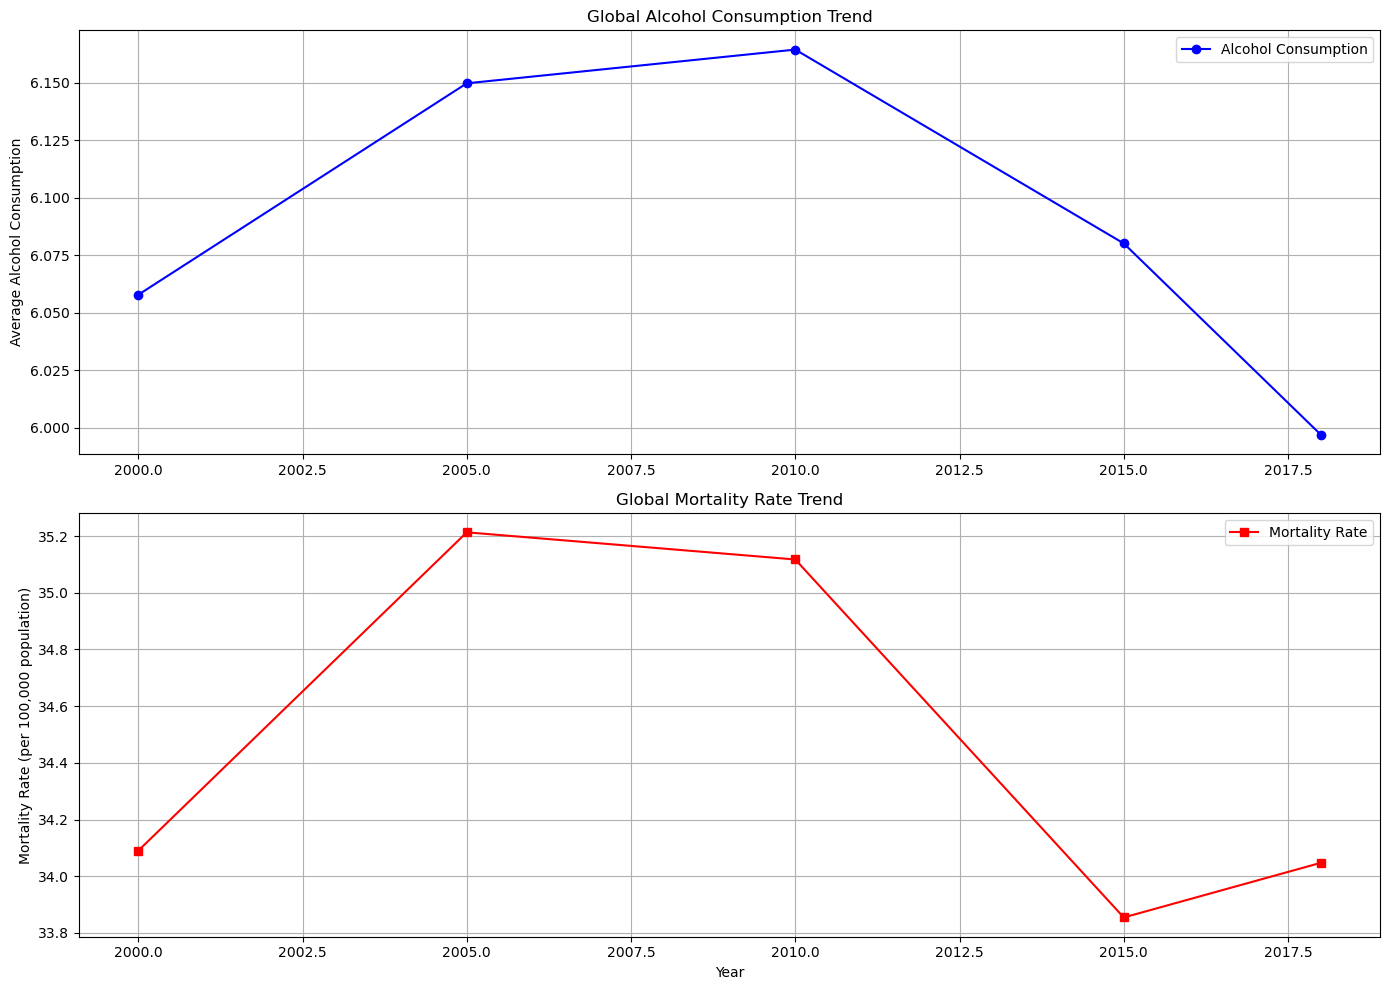

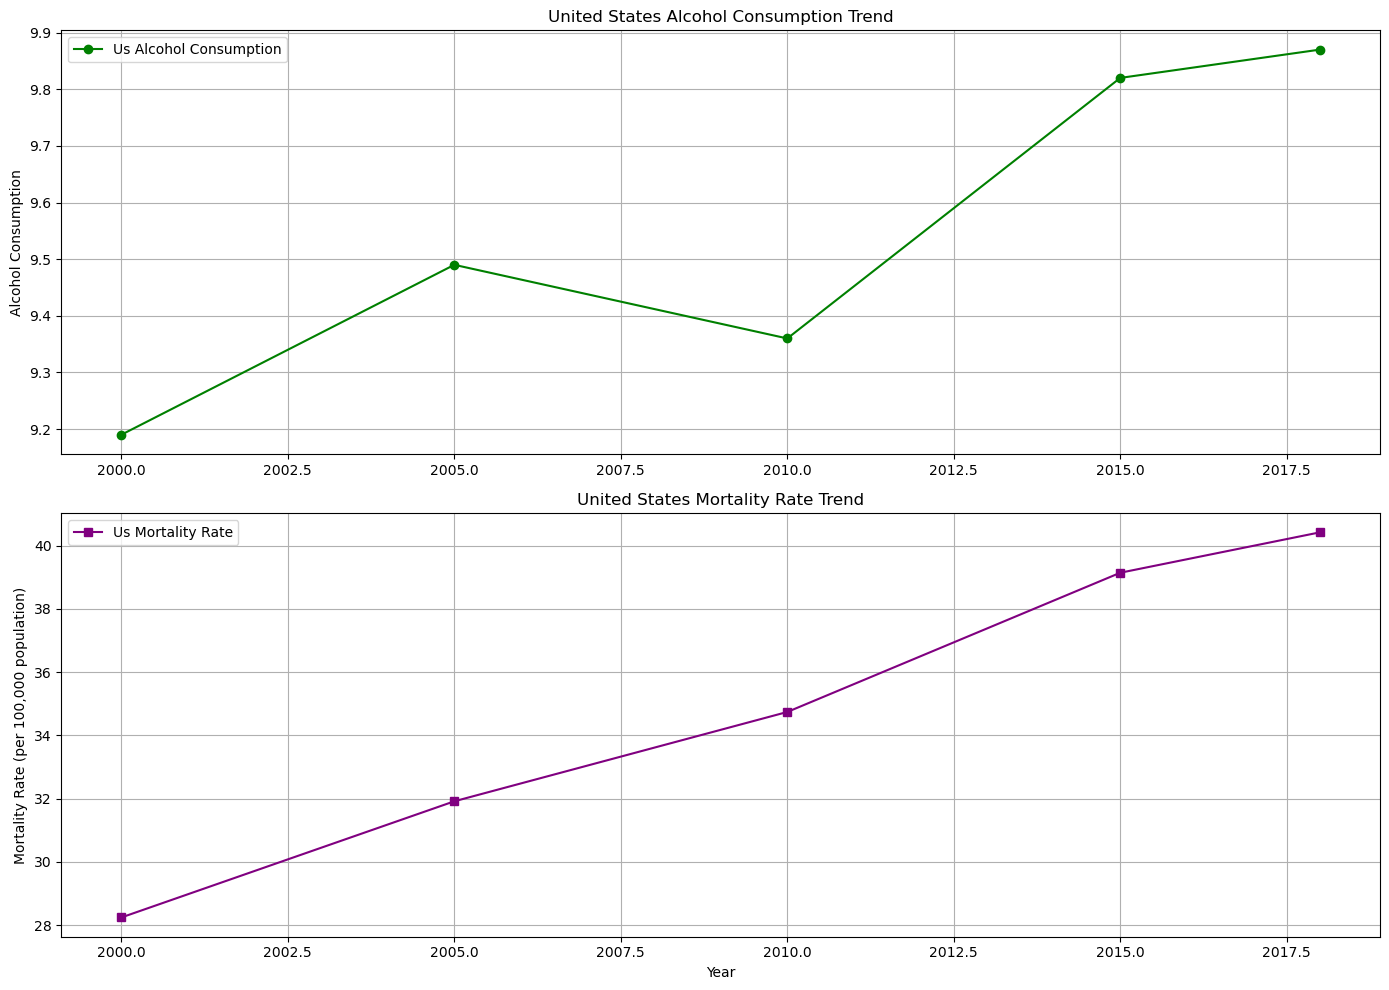

In [49]:
# Plotting Global Trends
plt.figure(figsize=(14, 10))

# Global Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(global_trends['Year'], global_trends['Alchohol consumption'], marker='o', linestyle='-', color='blue',label='Alcohol Consumption')
plt.title('Global Alcohol Consumption Trend')
plt.ylabel('Average Alcohol Consumption')
plt.grid(True)
plt.legend()

# Global Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(global_trends['Year'], global_trends['Mortality Rate'], marker='s', linestyle='-', color='red',label='Mortality Rate')
plt.title('Global Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Time Series Analysis for a Specific Country (Example: United States)
country_name = 'United States'
country_data = df[df['Country'] == country_name]

# Plotting Country-Specific Trends
plt.figure(figsize=(14, 10))

# Country-Specific Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(country_data['Year'], country_data['Alchohol consumption'], marker='o', linestyle='-', color='green', label='Us Alcohol Consumption')
plt.title(f'{country_name} Alcohol Consumption Trend')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)

# Country-Specific Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(country_data['Year'], country_data['Mortality Rate'], marker='s', linestyle='-', color='purple',label='Us Mortality Rate')
plt.title(f'{country_name} Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

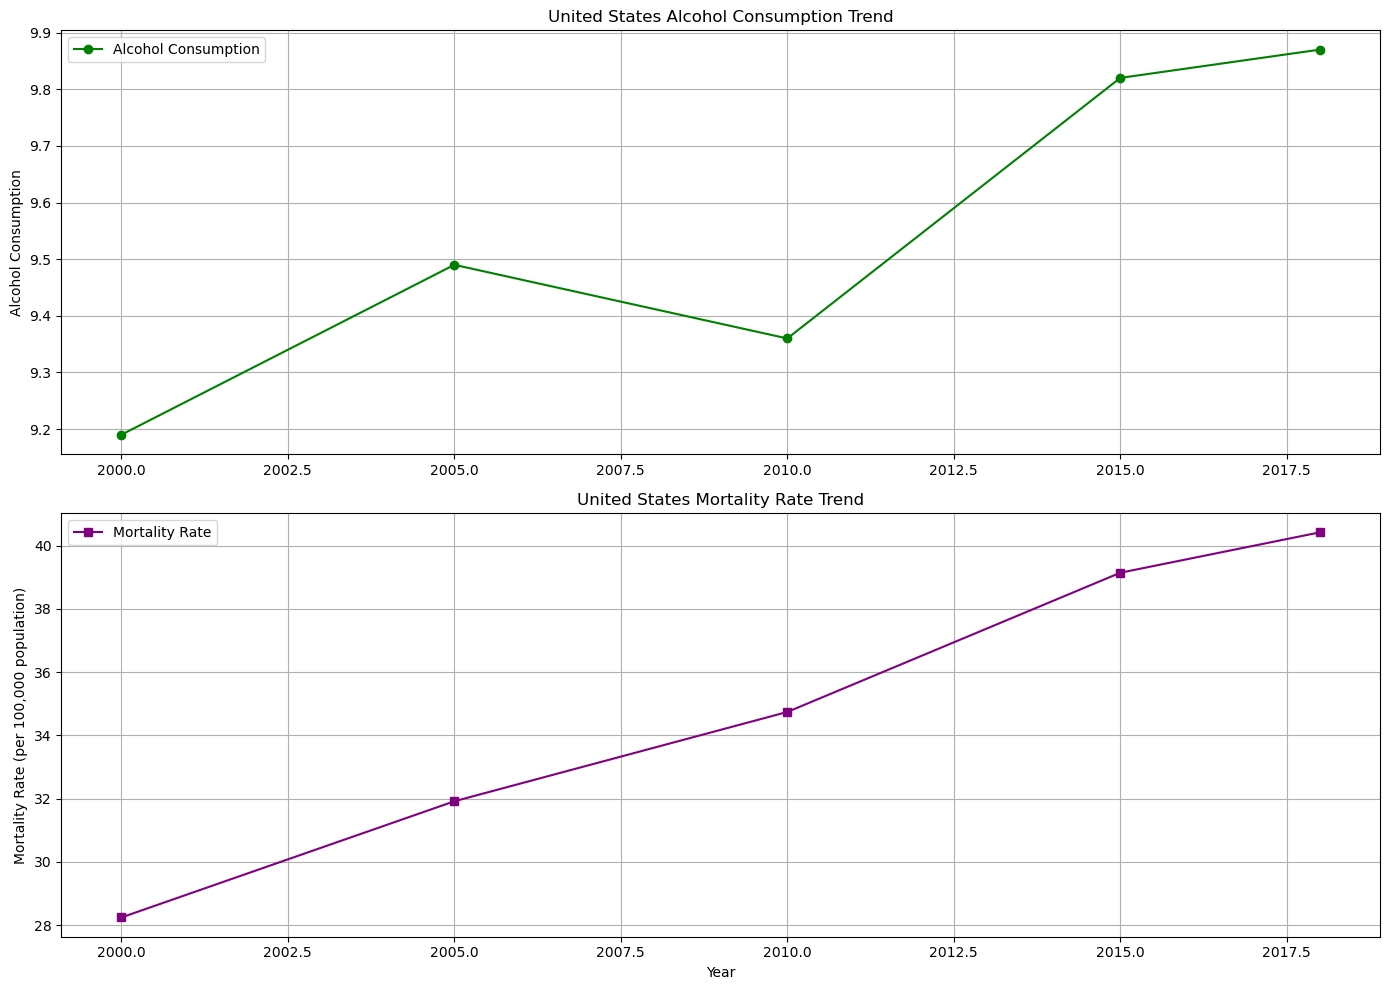

In [50]:
plt.figure(figsize=(14, 10))

# Country-Specific Alcohol Consumption Trend
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(country_data['Year'], country_data['Alchohol consumption'], marker='o', linestyle='-', color='green', label='Alcohol Consumption')
plt.title(f'{country_name} Alcohol Consumption Trend')
plt.ylabel('Alcohol Consumption')
plt.grid(True)
plt.legend() 

# Country-Specific Mortality Rate Trend
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(country_data['Year'], country_data['Mortality Rate'], marker='s', linestyle='-', color='purple', label='Mortality Rate')
plt.title(f'{country_name} Mortality Rate Trend')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.grid(True)
plt.legend() 

plt.tight_layout()
plt.show()


<h1> Global Alchohol consumption Trend with Interactive plt </h1>

In [51]:
# Ensuring the data is sorted by Year if it's not already
global_trends_sorted = global_trends.sort_values('Year')

# Function to update the plot
def update_plot(selected_year):
    filtered_data = global_trends_sorted[global_trends_sorted['Year'] <= selected_year]
    
    # Create a Plotly express line plot
    fig = px.line(filtered_data, x='Year', y='Alchohol consumption', 
                  title='Global Alcohol Consumption Trend',
                  labels={'Alchohol consumption': 'Average Alcohol Consumption'})
    
    # Update layout
    fig.update_layout(transition_duration=500)
    fig.show()

# Create a slider
slider = IntSlider(
    value=global_trends_sorted['Year'].max(),
    min=global_trends_sorted['Year'].min(),
    max=global_trends_sorted['Year'].max(),
    step=1,
    description='Year:',
    continuous_update=False
)

# Display the interactive slider and plot
interact(update_plot, selected_year=slider)



interactive(children=(IntSlider(value=2018, continuous_update=False, description='Year:', max=2018, min=2000),…

<function __main__.update_plot(selected_year)>

<h1>Correlation Analysis</h1>

In [52]:
# Alchohol consumption and Mortality Rate columns
correlation_analysis = df[['Alchohol consumption', 'Mortality Rate']].corr()

print(correlation_analysis)


                      Alchohol consumption  Mortality Rate
Alchohol consumption              1.000000        0.766603
Mortality Rate                    0.766603        1.000000


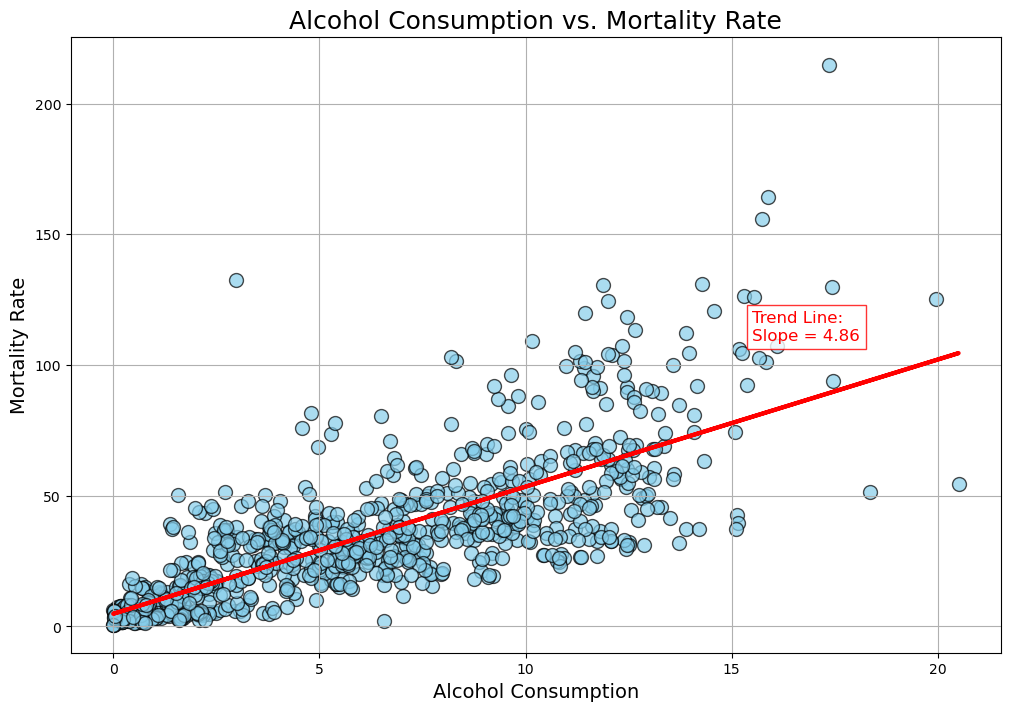

Correlation coefficient: 0.77


In [53]:
df.dropna(subset=["Mortality Rate"], inplace=True)

x = df['Alchohol consumption']
y = df['Mortality Rate']


# Creating the scatter plot 
plt.figure(figsize=(12, 8))  
plt.scatter(x, y, alpha=0.7, s=100, edgecolor='k', color='skyblue') 

# Adding a trend line
m, b = np.polyfit(x, y, 1)  # coefficients of the line
plt.plot(x, m*x + b, color='red', linewidth=3)  # Thicker line for better visibility

# Adding labels and title 
plt.title('Alcohol Consumption vs. Mortality Rate', fontsize=18)
plt.xlabel('Alcohol Consumption', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.grid(True)

# the trend line
plt.text(x.max()-5, m*x.max() + b + 5, f'Trend Line:\nSlope = {m:.2f}', color='red', fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.show()


# Correlation coefficient
correlation = np.corrcoef(df['Alchohol consumption'], df['Mortality Rate'])[0, 1]
print(f'Correlation coefficient: {correlation:.2f}')

Based on the scatter plot, Although we see slightly upward trend, we can form the following hypothesis:

The correlation coefficient is 0.77 which indicates it is moderately likely Alcohol consumption has relations to Mortality Rate. Correlation is not always result in  causation. Further studies and conditions are necessary to prove this hypothesis. Therefore, I failed to reject my hypothesis.